<a href="https://colab.research.google.com/github/MCygert/preparing_for_tensorflow_certificate/blob/main/03_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks and Computer vision with Tensorflow

### Get data

In [30]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2021-12-26 10:54:57--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.97.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M   278MB/s    in 0.4s    

2021-12-26 10:54:58 (278 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



## Inspect data

In [31]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [32]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [33]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [34]:
# Let's visualize our image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random


def view_random_image(target_dir, target_class):
    # Setup the target directory (we'll view images from here)
    target_folder = target_dir + target_class

    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)

    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    print(f"Image shape: {img.shape}")
    return img

['43924.jpg']
Image shape: (384, 512, 3)


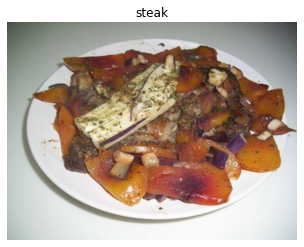

In [35]:
# View a random image from the trainig dataset
img = view_random_image(target_dir='pizza_steak/train/', target_class='steak')

In [36]:
import tensorflow as tf

tf.constant(img)
img_normalized = img / 255

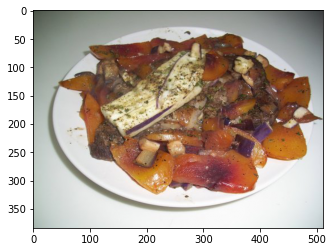

In [37]:
plt.imshow(img_normalized)

## An end-to-end example
Let's build a convolutional neural network to find patterns in our iamges, more specifically we aneed way to go
* Load oure images
* Preprocess our images
* Build a CNN to find patterns in our images

In [38]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 9s 174ms/step - loss: 0.5588 - accuracy: 0.7267 - val_loss: 0.3984 - val_accuracy: 0.8200
Epoch 2/5
47/47 [==============================] - 8s 168ms/step - loss: 0.4357 - accuracy: 0.8067 - val_loss: 0.4043 - val_accuracy: 0.8100
Epoch 3/5
47/47 [==============================] - 8s 169ms/step - loss: 0.3937 - accuracy: 0.8293 - val_loss: 0.3159 - val_accuracy: 0.8700
Epoch 4/5
47/47 [==============================] - 8s 168ms/step - loss: 0.3681 - accuracy: 0.8433 - val_loss: 0.3298 - val_accuracy: 0.8780
Epoch 5/5
47/47 [==============================] - 8s 168ms/step - loss: 0.3402 - accuracy: 0.8507 - val_loss: 0.3141 - val_accuracy: 0.8660


In [39]:
# Get a model summary
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_7 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_8 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_9 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

In [40]:
!nvidia-smi

Sun Dec 26 10:55:41 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    32W / 250W |   2125MiB / 16280MiB |      7%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [41]:
## Using the same model as 

## Using the same model as before
Let's replicate the model we've built in previous to see if it wokrs with our image data.

In [42]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224,224,3)),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')

])
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
history_2 = model_2.fit(train_data, epochs=5, steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 171ms/step - loss: 0.9322 - accuracy: 0.4987 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 170ms/step - loss: 0.6932 - accuracy: 0.4720 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 166ms/step - loss: 0.6932 - accuracy: 0.4840 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 169ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 168ms/step - loss: 0.6932 - accuracy: 0.4947 - val_loss: 0.6931 - val_accuracy: 0.5000


In [43]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224,224,3)),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')

])
model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
history_3 = model_3.fit(train_data, epochs=5, steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 175ms/step - loss: 0.8100 - accuracy: 0.5160 - val_loss: 0.7160 - val_accuracy: 0.4040
Epoch 2/5
47/47 [==============================] - 8s 167ms/step - loss: 0.6031 - accuracy: 0.6760 - val_loss: 0.6988 - val_accuracy: 0.6500
Epoch 3/5
47/47 [==============================] - 8s 168ms/step - loss: 0.6340 - accuracy: 0.7093 - val_loss: 0.5911 - val_accuracy: 0.7600
Epoch 4/5
47/47 [==============================] - 8s 169ms/step - loss: 0.5779 - accuracy: 0.7493 - val_loss: 0.5695 - val_accuracy: 0.7040
Epoch 5/5
47/47 [==============================] - 8s 168ms/step - loss: 0.5863 - accuracy: 0.7487 - val_loss: 0.6873 - val_accuracy: 0.5880


In [44]:
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 150528)            0         
                                                                 
 dense_3 (Dense)             (None, 4)                 602116    
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [45]:
model_3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 150528)            0         
                                                                 
 dense_6 (Dense)             (None, 10)                1505290   
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
 dense_8 (Dense)             (None, 10)                110       
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,505,521
Trainable params: 1,505,521
Non-trainable params: 0
_________________________________________________________________


In [46]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(224,224,3)),
                               tf.keras.layers.Dense(100, activation="relu"),
                               tf.keras.layers.Dense(100, activation='relu'),
                               tf.keras.layers.Dense(100, activation='relu'),
                               tf.keras.layers.Dense(1, activation='sigmoid')
])
model_4.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_4 = model_4.fit(train_data, epochs=5, steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 174ms/step - loss: 2.2541 - accuracy: 0.6447 - val_loss: 0.7315 - val_accuracy: 0.7320
Epoch 2/5
47/47 [==============================] - 8s 164ms/step - loss: 0.8732 - accuracy: 0.6947 - val_loss: 1.0842 - val_accuracy: 0.5720
Epoch 3/5
47/47 [==============================] - 8s 169ms/step - loss: 0.7678 - accuracy: 0.7113 - val_loss: 0.5071 - val_accuracy: 0.7920
Epoch 4/5
47/47 [==============================] - 8s 168ms/step - loss: 0.5695 - accuracy: 0.7493 - val_loss: 1.1125 - val_accuracy: 0.5900
Epoch 5/5
47/47 [==============================] - 8s 170ms/step - loss: 0.5390 - accuracy: 0.7667 - val_loss: 0.6044 - val_accuracy: 0.7180


## Binary classifciation: Breakingh down
1. Visualize data
2. Preprocess the data (normalize, standarize)
3. Create a model (start with baseline)
4. Fit the model
5. Evaluate the mode
6. Adjust the differnen parameters and improve the model
7. Repeat untill satisfied.

['3663800.jpg']
Image shape: (512, 512, 3)
['3678290.jpg']
Image shape: (512, 512, 3)


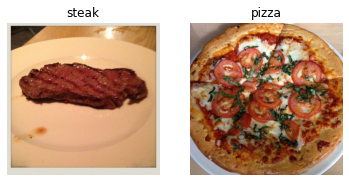

In [47]:
# Visualize data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image('pizza_steak/train/', 'steak')
plt.subplot(1,2,2)
steak_img = view_random_image('pizza_steak/train/', 'pizza')


### Preprocessing data

In [48]:
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'


Our next step is to turn our data into batches.

In [49]:
# Create a train and test data generators and rescale the data.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [50]:
train_data = train_datagen.flow_from_directory(directory=train_dir,target_size=(224,224),class_mode="binary", batch_size=32)
test_data = test_datagen.flow_from_directory(directory=test_dir, target_size=(224,224), class_mode="binary")

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [51]:
images, labels  = train_data.next()
len(images), len(labels)

(32, 32)

In [52]:
images[:2], images[0].shape

(array([[[[0.69411767, 0.5686275 , 0.50980395],
          [0.69411767, 0.57254905, 0.5019608 ],
          [0.69411767, 0.58431375, 0.5019608 ],
          ...,
          [0.5294118 , 0.427451  , 0.29803923],
          [0.5294118 , 0.427451  , 0.28235295],
          [0.5294118 , 0.43137258, 0.27058825]],
 
         [[0.7058824 , 0.58431375, 0.5137255 ],
          [0.69803923, 0.5882353 , 0.5058824 ],
          [0.6862745 , 0.5764706 , 0.49411768],
          ...,
          [0.54509807, 0.4431373 , 0.3137255 ],
          [0.5294118 , 0.427451  , 0.2901961 ],
          [0.5294118 , 0.427451  , 0.28235295]],
 
         [[0.6862745 , 0.5764706 , 0.4901961 ],
          [0.68235296, 0.57254905, 0.48627454],
          [0.69411767, 0.58431375, 0.5019608 ],
          ...,
          [0.5568628 , 0.45098042, 0.33333334],
          [0.5411765 , 0.43529415, 0.31764707],
          [0.5411765 , 0.43921572, 0.30980393]],
 
         ...,
 
         [[0.7725491 , 0.56078434, 0.41176474],
          [0.76862

### 3. Create a cnn model (start with a baseline)
A baseline is a relatively simple model or existing result that you setup when beginning a machine learnign experminet and then you try to make it better.

In [53]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [54]:
model_5 = Sequential([
                      Conv2D(filters=10, kernel_size=3, strides=1, padding='valid',activation='relu', input_shape=(224,224,3)),
                      Conv2D(10,3,activation='relu'),
                      Conv2D(10,3, activation='relu'),
                      Flatten(),
                      Dense(1, activation='sigmoid')

])
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

model_5_history = model_5.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 177ms/step - loss: 0.8343 - accuracy: 0.7293 - val_loss: 0.4380 - val_accuracy: 0.7860
Epoch 2/5
47/47 [==============================] - 8s 171ms/step - loss: 0.3929 - accuracy: 0.8393 - val_loss: 0.4039 - val_accuracy: 0.8200
Epoch 3/5
47/47 [==============================] - 8s 172ms/step - loss: 0.2756 - accuracy: 0.9000 - val_loss: 0.3946 - val_accuracy: 0.8280
Epoch 4/5
47/47 [==============================] - 8s 170ms/step - loss: 0.1247 - accuracy: 0.9660 - val_loss: 0.4930 - val_accuracy: 0.7900
Epoch 5/5
47/47 [==============================] - 8s 172ms/step - loss: 0.0616 - accuracy: 0.9867 - val_loss: 0.6211 - val_accuracy: 0.7940


### Evaluate our models

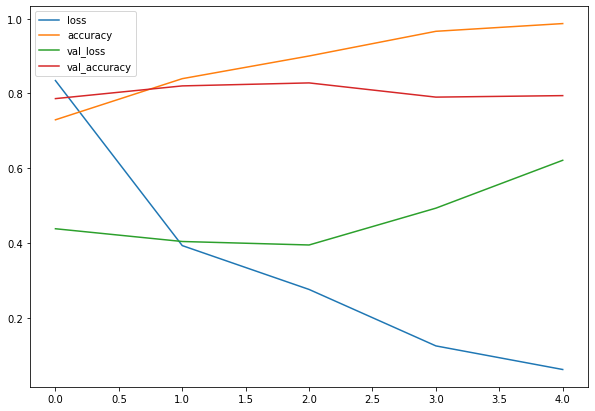

In [57]:
import pandas as pd
pd.DataFrame(model_5_history.history).plot(figsize=(10,7))

In [60]:
def plot_loss_cuves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  epochs  = range(len(history.history['loss']))

  plt.plot(epochs, loss, label='training loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label='training accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend()


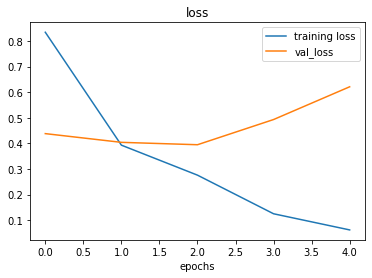

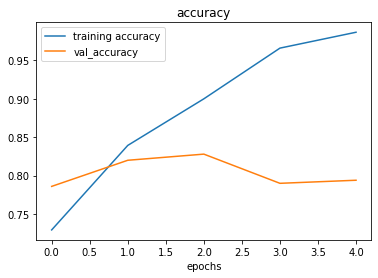

In [62]:
#Check out the loss and accuracy of model 5
plot_loss_cuves(model_5_history)

### How to adjust the model parameters
fitting a machine learning model comes in 3 steps:
0. create baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting
* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer

Reduce overfitting
* Add data augemntation
* Add regularization layers (e.g MaxPool2D)
* Add more

In [68]:
model_6 = Sequential([
                      Conv2D(10,3, activation='relu', input_shape=(224,224,3)),
                      MaxPool2D(pool_size=2),
                      Conv2D(10,3, activation='relu'),
                      MaxPool2D(),
                      Conv2D(10,3,activation='relu'),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation='sigmoid')
])

model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])
model_6.fit(test_data, )